<a href="https://colab.research.google.com/github/jkchandalia/nlp/blob/main/notebooks/4.0%20Generative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI**

In [2]:
#@title **Setup**
!pip install transformers diffusers accelerate| grep -v -e 'already satisfied' -e 'Downloading'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## [GPT (Generative Pretrained Transformer) Models](https://huggingface.co/docs/transformers/model_doc/gpt2)
##### Transformer Decoder


<figure>
<center>
<p align="center">
<img src='https://drive.google.com/uc?export=view&id=1YCa3ucZmkr6vUwlLTRVIRCMcU3ReO7Oy' alt="History of LLMs", width="600" height="300"/>
</p>
<figcaption>Transformer Decoder (credit: Jay Alammar, https://jalammar.github.io/illustrated-gpt2/)</figcaption></center>
</figure>


#### *Self-supervised Learning*

*Next Word Prediction*

As a quick recap from part I, BERT built knowledge about language by learning to predict masked tokens and learning whether pairs of sentences were related. In contrast the Generative Pretrained Transformer model, aka GPT was trained by taking the beginning of a sentence and learning to predict the next word of the sentence. As with BERT, when trained over a huge amount of data, this can produce a power large language model. To see a concrete example, let’s take the first part of a sentence:

**The dog ran across the yard to get the < BLANK >**

What is next word that makes sense? What's a next word that is unlikely?


The following demo is adapted from this [blog](https://huggingface.co/blog/how-to-generate)

### *Models*

In [18]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

device = 'cuda'

tokenizer1 = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model1 = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id).to(device)


In [1]:
from transformers import GPTNeoForCausalLM, GPT2Tokenizer

model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B")
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")

prompt = (
    "In a shocking finding, scientists discovered a herd of unicorns living in a remote, "
    "previously unexplored valley, in the Andes Mountains. Even more surprising to the "
    "researchers was the fact that the unicorns spoke perfect English."
)

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [2]:
gen_text

'In a shocking finding, scientists discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English. They had toillation (i.e., a low, musical sound produced by a human voice) and could also make the sound of whistling. This means that the animals were able to communicate between them and the humans. The researchers also said that the unicorns were able'

### *Prompt*

In [11]:
prompt_dog = 'I enjoy walking with my cute dog'
prompt_unicorn = (
    "In a shocking finding, scientists discovered a herd of unicorns living in a remote, "
    "previously unexplored valley, in the Andes Mountains. Even more surprising to the "
    "researchers was the fact that the unicorns spoke perfect English."
)

prompt = (
    "I am in a tutorial about BERT and Generative AI and I just wonder if these models "
    "are going to join forces and escape our computers and turn into AGI"
)

### *Text Generation*

In [17]:
# encode context the generation is conditioned on
input_ids = tokenizer1.encode(prompt, return_tensors='pt').to('cuda')

# generate text until the output length (which includes the context length) reaches 50

sample_output = model1.generate(
    input_ids,
    do_sample=True, 
    max_length=100, 
    top_k=50, 
    top_p=0.95, 
)
print("Output:\n" + 100 * '-')
print(tokenizer1.decode(sample_output[0], skip_special_tokens=True))


Output:
----------------------------------------------------------------------------------------------------
In a shocking finding, scientists discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.

Advertisement

The unicorns are not native to the Andes region, but were found when they were found in Peru, Bolivia, and Ecuador, said a press release from the Nature Conservancy, which helps guide conservation efforts in North America.

"While


#### What do we think of this output? Let's try the same prompts in [ChatGPT](https://chat.openai.com/chat).

### *Discussion*
What are some differences between the ChatGPT output and the GPT output in our notebook? What are some similarities? 

***

## [Diffusion](https://huggingface.co/docs/diffusers/index)

### Model Overview
<figure>
<center>
<p align="center">
<img src='https://drive.google.com/uc?export=view&id=17aK7j_ZRB3r0S9mAb2S7Ikz74bFPbW18' alt="Stable Diffusion Model", width="600" height="400"/>
</p>
<figcaption>Text-Image Alignment in Stable Diffusion Models (credit: OpenAI)</figcaption></center>
</figure>

A key component of Stable Diffusion is embedding alignment between related text and images. 

This allows us to go from **text -> text embedding -> image embedding -> image**. 

In [20]:
#@title Import libraries
from diffusers import DiffusionPipeline
import torch
import requests
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline


### *Model*

In [21]:
device = "cuda"
generator = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1")
generator.to(device)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.15.0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### *Prompt*

In [22]:
prompt = "An image of a squirrel in Monet style"

### *Image Generation from Text*

  0%|          | 0/50 [00:00<?, ?it/s]

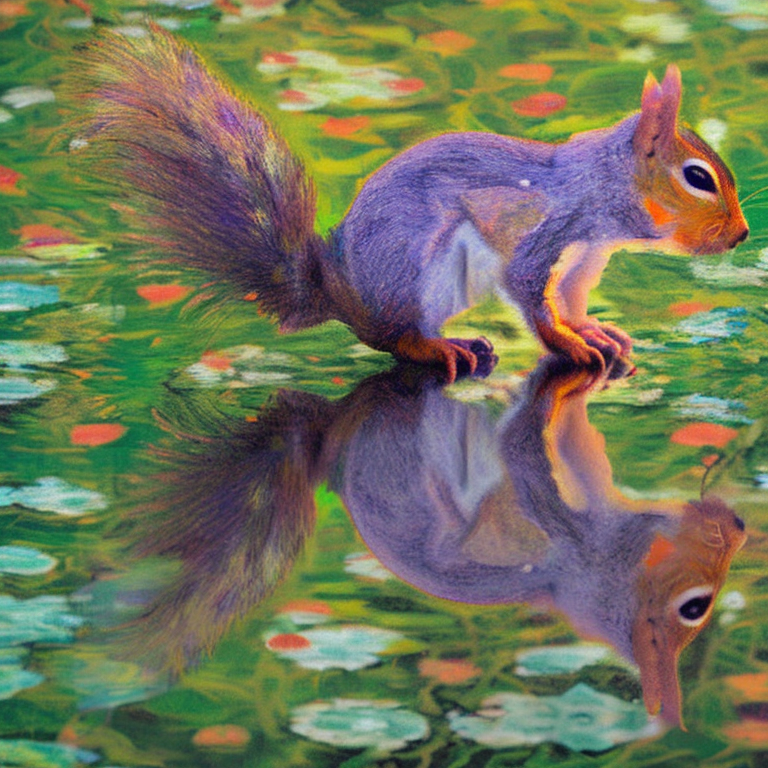

In [23]:


image = generator(prompt).images[0]
#image.save("image_of_squirrel_painting.png")
image

#### What do we think of the output? Let's try the same prompt in [DALL-E 2](https://labs.openai.com/) and compare.

***

### *Model*

In [ ]:
# load the pipeline

pipe = StableDiffusionImg2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16).to(
    device
)

### *Initial Image*

In [ ]:
# let's download an initial image
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))

### *Prompt*

In [ ]:
prompt = "A fantasy landscape, trending on artstation"

### *Image Generation from both Text and Image*

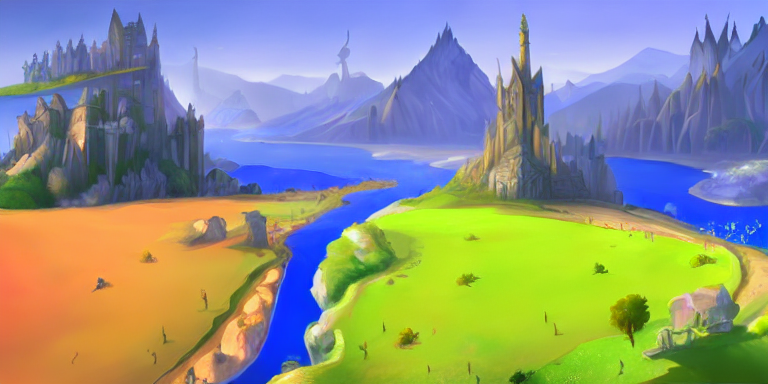

In [ ]:
images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images
#images[0].save("fantasy_landscape.png")

images[0]